# Chose 4 different regression techniques

## Read data

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics

from itertools import combinations

## Metrics function
Function prints out different metrics of the predictions.
- MAE
- MAPE
- RMSE
- R2

In [3]:
def print_metrics(y_hat, y_test):
    output = pd.DataFrame({'MAE': [round(np.mean(abs(y_hat-y_test)), 2)],
                   'MAPE': [round(np.mean(abs(y_hat-y_test)/y_test), 4)],
                   'RMSE': [round(np.sqrt(np.mean((y_test - y_hat)**2)), 2)],
                   ' R2': [round(metrics.r2_score(y_test, y_hat),2)]
                   })
    return output

In [4]:
wine = pd.read_csv('data/wine/winequality-white.csv', sep=';')

### Check data
`info()` method shows if there are missing values
it shows that there aren't any missing values (non-null for every feature)

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
wine.shape

(4898, 12)

## Preprocessing (without scaling)
# TODO

## Feature Pearson Correlation
Correlations are looking fine. Maybe we should get rid of `density` or `residual sugar` 
but lets see how our models perform.

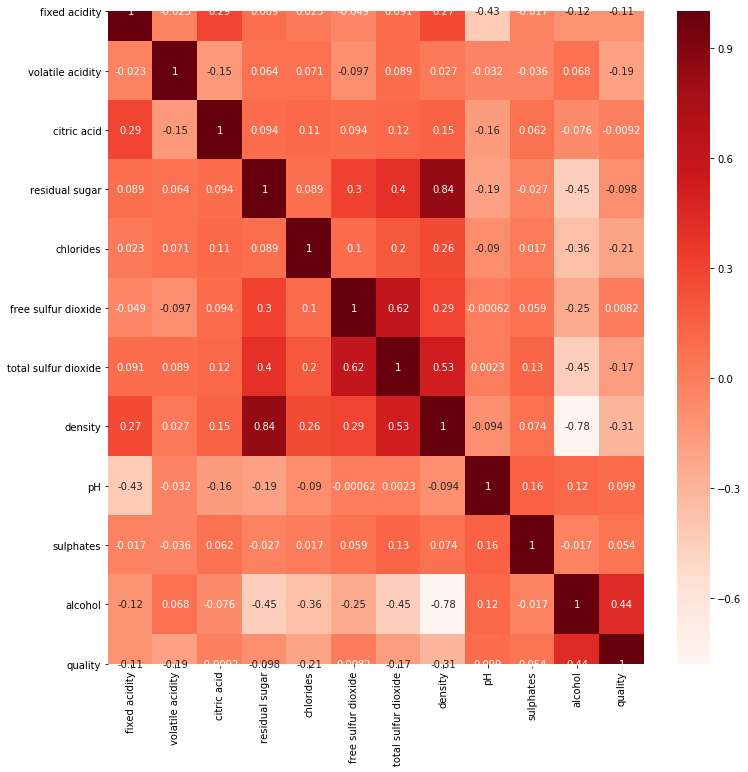

In [7]:
plt.figure(figsize=(12,12))
cor = wine.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Creating feature and target arrays

In [104]:
#wine_dropped = wine.drop(['free sulfur dioxide', 'total sulfur dioxide','fixed acidity'],axis = 1)
wine_dropped = wine # improvement with dropped features ridge/lasso 0.005 RMSE, other are getting worse
X = wine_dropped.drop('quality', axis = 1).values
y = wine['quality'].values

{'whiskers': [<matplotlib.lines.Line2D at 0x7f284e8293d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f284e829e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f284e3fc290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f284e832910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f284e832e10>],
 'means': []}

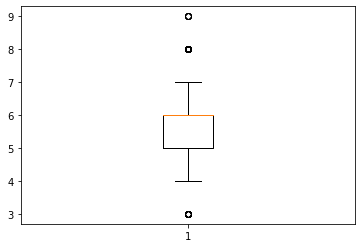

In [9]:
plt.boxplot(y)

## Creating train and test data 

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

## Starting with a simple model to:
+ get a sense of how challenging the problem is
+ many more things might go wrong with complex models
+ how much signal can we pull out using basic models

## Ridge regression
__Score history:__
- Test set RMSE of rf: 0.75

### Ridge parameters
- __alpha:__
    - regularization strength: the higher the value, the stronger the regularization
- __fit_intercept:__
    - weather to calculate an intercept for this model (e. g. not needed if centered) 
- __normalize:__
    - if `fit_intercept` and `normalize` are both `True` the regressor X will be normalized

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [123]:
# create parameter list for ridge regression
params_ridge = {
    'alpha':[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'normalize': [True, False],
    'fit_intercept': [True]
}

ridge = Ridge()

In [124]:
# setup cross validation parameter grid search
grid_ridge = GridSearchCV(estimator=ridge,
    param_grid=params_ridge,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [125]:
num_removed_features = 3
cols = wine_dropped.columns
best1 = {}
cols = combinations(cols, num_removed_features)
for col in cols:
    my_wine_dropped = wine_dropped.drop(np.append(np.array(col), 'quality'), axis=1)
    X = my_wine_dropped.values
    y = wine['quality'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    grid_ridge.fit(X_train, y_train)
    y_pred_ridge = grid_ridge.predict(X_test)
    rmse_test_ridge = MSE(y_test, y_pred_ridge)**(1/2)
    best1[col] = rmse_test_ridge
    print('(' + str(col) + '): Test set RMSE of rf: {:.3f}'.format(rmse_test_ridge))
print (best2)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'citric acid')): Test set RMSE of rf: 0.765
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'residual sugar')): Test set RMSE of rf: 0.774
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'chlorides')): Test set RMSE of rf: 0.765
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'free sulfur dioxide')): Test set RMSE of rf: 0.765
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'total sulfur dioxide')): Test set RMSE of rf: 0.766
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'density')): Test set RMSE of rf: 0.769
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'pH')): Test set RMSE of rf: 0.766
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'sulphates')): Test set RMSE of rf: 0.764
Fitting 3 folds for each of 20 candidates, totalling 60 fits
(('fixed acidity', 'volatile acidity', 'alcohol')): Test set RMSE of rf: 0.768
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'volatile acidity', 'quality')): Test set RMSE of rf: 0.763
Fitting 3 folds for each of 20 candidates, totalling 60 fits
(('fixed acidity', 'citric acid', 'residual sugar')): Test set RMSE of rf: 0.756
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'citric acid', 'chlorides')): Test set RMSE of rf: 0.746
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'citric acid', 'free sulfur dioxide')): Test set RMSE of rf: 0.745
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'citric acid', 'total sulfur dioxide')): Test set RMSE of rf: 0.746
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'citric acid', 'density')): Test set RMSE of rf: 0.751
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'citric acid', 'pH')): Test set RMSE of rf: 0.747
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'citric acid', 'sulphates')): Test set RMSE of rf: 0.747
Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


(('fixed acidity', 'citric acid', 'alcohol')): Test set RMSE of rf: 0.756
Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [126]:
# fitting model on training data
grid_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9],
                         'fit_intercept': [True], 'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [127]:
# extracting best parameters (can be used for finer hyper parameter tuning)
grid_ridge.best_params_

{'alpha': 0.05, 'fit_intercept': True, 'normalize': True}

In [128]:
# predicting values and calculating the rmse-score
y_pred_ridge = grid_ridge.best_estimator_.predict(X_test)
rmse_test_lasso = MSE(y_test, y_pred_ridge)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_lasso))

Test set RMSE of rf: 0.75


In [144]:
print_metrics(y_pred_ridge, y_test)

,MAE,MAPE,RMSE,R2
0,0.58,0.102,0.75,0.26


In [145]:
# To use with Pycharm and dark theme
plt.style.use('ggplot')

#to increase font size
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 27}

plt.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


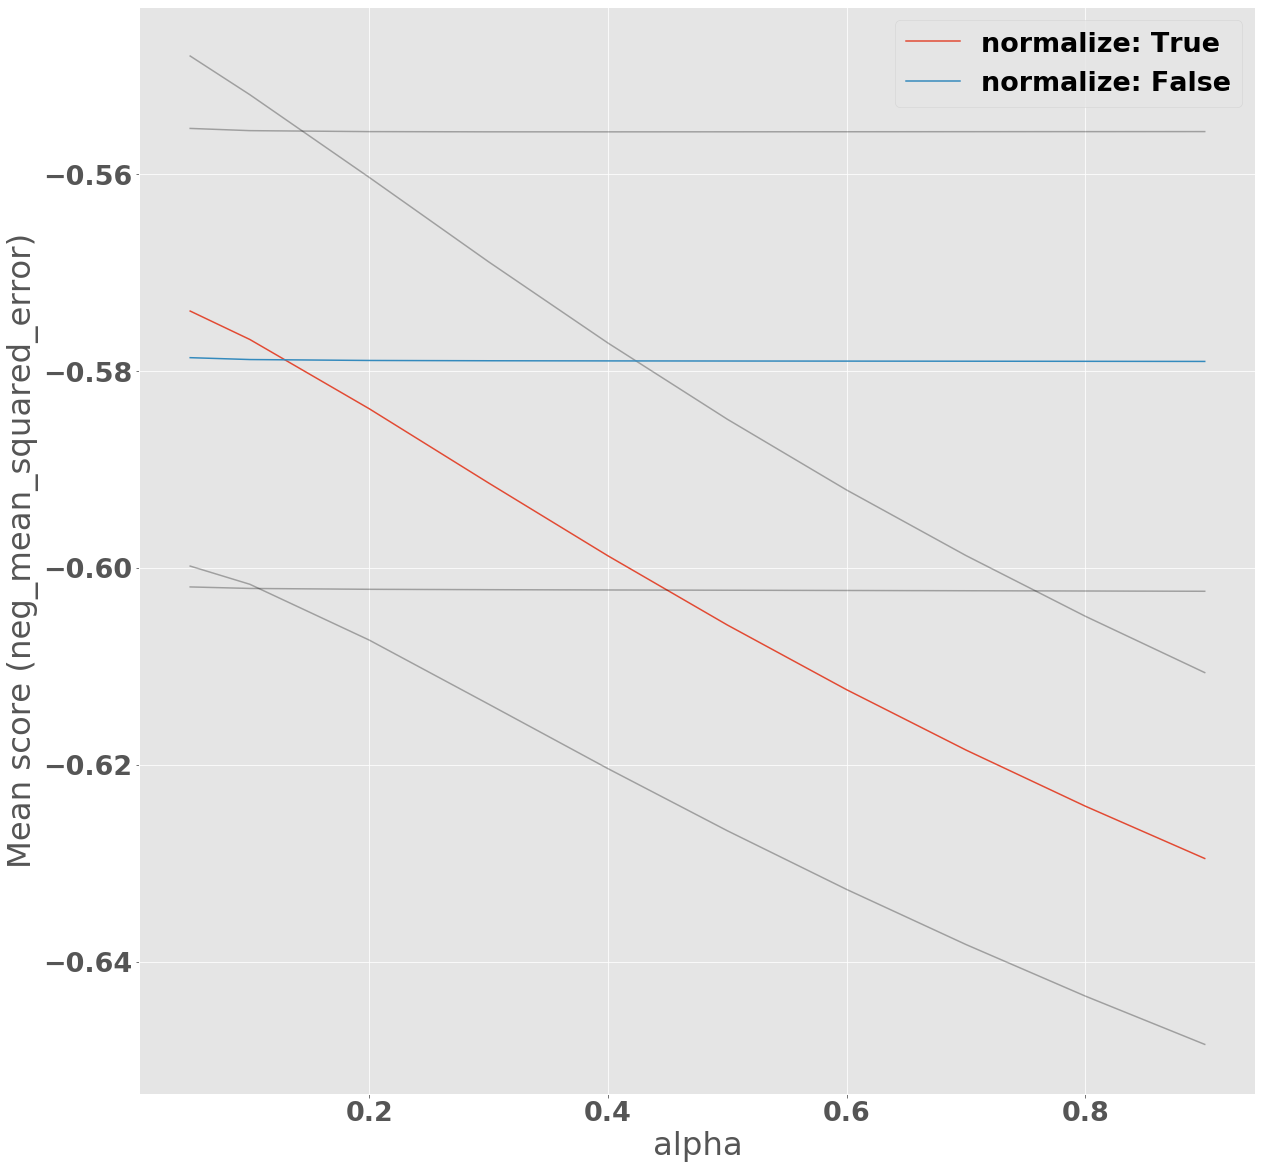

In [146]:
params = params_ridge
grid = grid_ridge
param1_name = 'normalize'
param2_name = 'alpha'
param1 = params[param1_name]
param2 = params[param2_name]

scores_df = pd.DataFrame(grid.cv_results_)

scores_mean = [x for x in scores_df['mean_test_score']]
scores_mean = np.array(scores_mean).reshape(len(param2), len(param1))
scores_mean = np.swapaxes(scores_mean,0,1)
scores_std = [x for x in scores_df['std_test_score']]
scores_std = np.array(scores_std).reshape(len(param2), len(param1))
scores_std = np.swapaxes(scores_std,0,1)

plt.figure(figsize=(20, 20))
for ind, i in enumerate(param1):
    plt.plot(param2, scores_mean[ind], label=param1_name+': ' + str(i))
    plt.plot(param2, scores_mean[ind] + scores_std[ind], color='black', alpha=0.3)
    plt.plot(param2, scores_mean[ind] - scores_std[ind], color='black', alpha=0.3)
plt.legend()
plt.xlabel(param2_name)
plt.ylabel('Mean score (neg_mean_squared_error)')
plt.show()

## Lasso regression
__Score history:__
- Test set RMSE of rf: 0.75

### Lasso Parameters:
- __alpha:__
    - constant that multiplies the L1-Norm
- __fit_intercept:__
    - weather to calculate an intercept for this model (e. g. not needed if centered) 
- __normalize:__
    - if `fit_intercept` and `normalize` are both `True` the regressor X will be normalized
- __positive:__
    - when `True` forces the coefficients to be positive

In [68]:
from sklearn.linear_model import Lasso

In [112]:
params_lasso = {
    'alpha': [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2],
    'normalize': [True, False],
    'fit_intercept': [True],
    'positive': [False] 
}

lasso = Lasso()

In [113]:
grid_lasso = GridSearchCV(estimator=lasso,
    param_grid=params_lasso,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [114]:
grid_lasso.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1, 1.1, 1.2],
                         'fit_intercept': [True], 'normalize': [True, False],
                         'positive': [False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [115]:
grid_lasso.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'normalize': False, 'positive': False}

In [116]:
y_pred_lasso = grid_lasso.predict(X_test)
rmse_test_lasso = MSE(y_test, y_pred_lasso)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_lasso))

Test set RMSE of rf: 0.76


In [74]:
print_metrics(y_pred_lasso, y_test)

,MAE,MAPE,RMSE,R2
0,0.58,0.1028,0.75,0.25


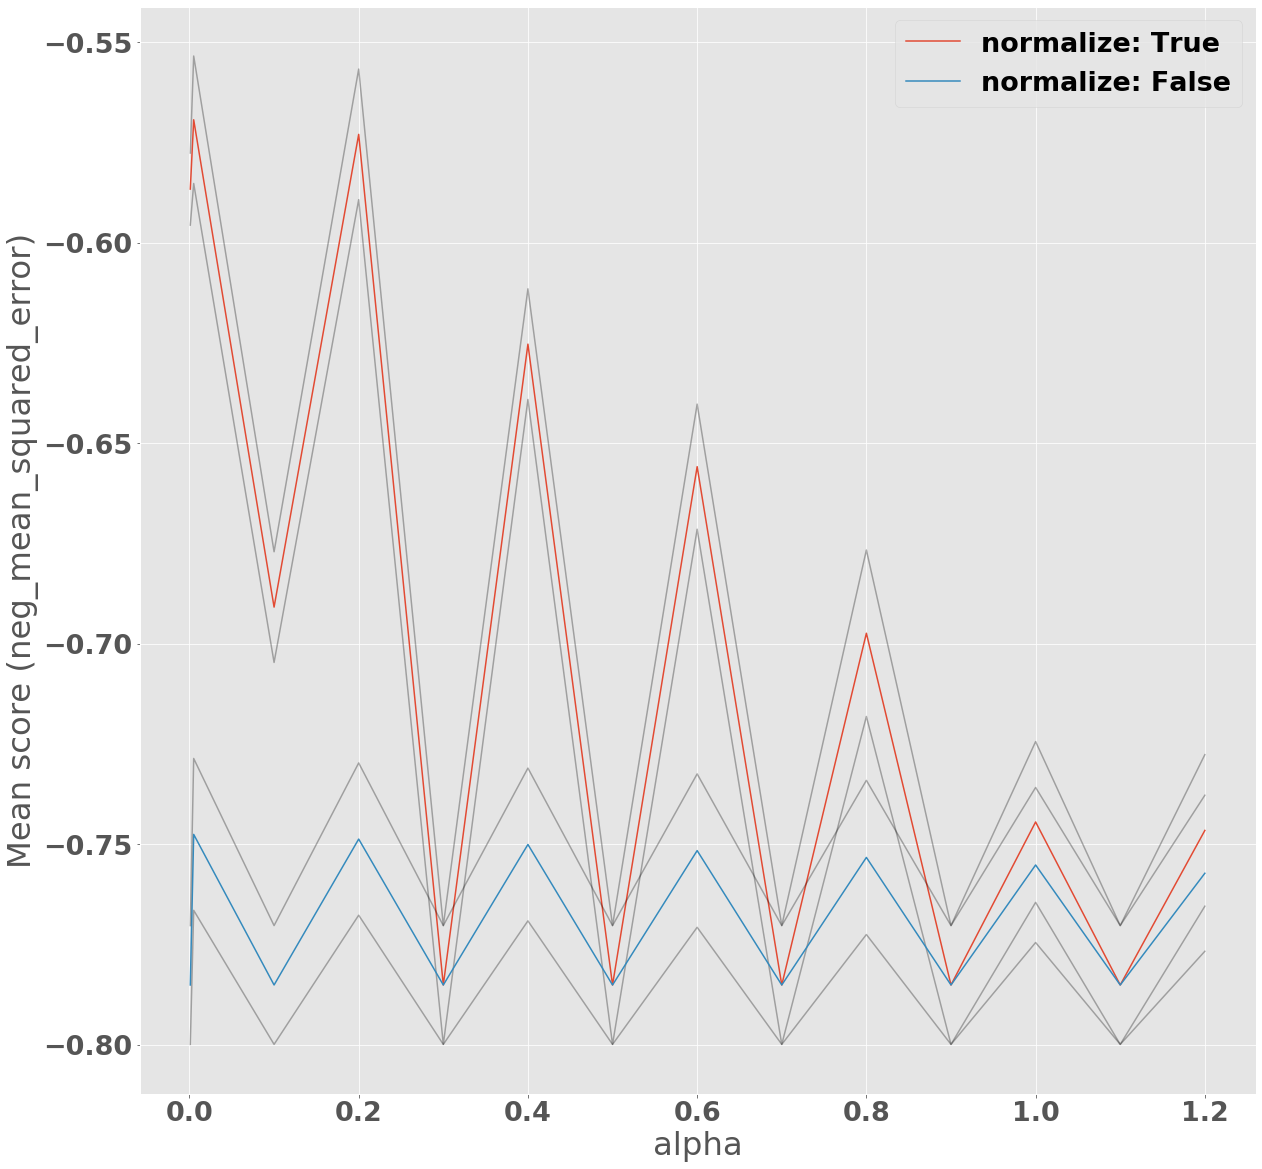

In [148]:
params = params_lasso
grid = grid_lasso
param1_name = 'alpha'
param2_name = 'normalize'
param1 = params[param1_name]
param2 = params[param2_name]

scores_df = pd.DataFrame(grid.cv_results_)

scores_mean = [x for x in scores_df['mean_test_score']]
scores_mean = np.array(scores_mean).reshape(len(param2), len(param1))
#scores_mean = np.swapaxes(scores_mean,0,1)
scores_std = [x for x in scores_df['std_test_score']]
scores_std = np.array(scores_std).reshape(len(param2), len(param1))
#scores_std = np.swapaxes(scores_std,0,1)

plt.figure(figsize=(20, 20))
for ind, i in enumerate(param2):
    plt.plot(param1, scores_mean[ind], label=param2_name+': ' + str(i))
    plt.plot(param1, scores_mean[ind] + scores_std[ind], color='black', alpha=0.3)
    plt.plot(param1, scores_mean[ind] - scores_std[ind], color='black', alpha=0.3)
plt.legend()
plt.xlabel(param1_name)
plt.ylabel('Mean score (neg_mean_squared_error)')
plt.show()

## Random Forest
__Score history:__
- Test set RMSE of rf: 0.60

### Random Forest parameters
- __n_estimators:__
    - number of trees in the forest
- __max_depth:__
    - maximum depth of the tree
- __min_samples_split:__
    - the min. number of samples required to split an internal node
- __min_samples_leaf:__
    - the minimum number of samples required to be at a leaf node
- __min_weight_fraction_leaf:__
    - the minimum weighted fraction of the sum total of weights
- __max_features:__
    - the number of features to consider when looking for the best split
- __min_impurity_decrease:__
    - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor(random_state=42)

In [77]:
# take a look at the rf's parameters
print(rf.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [80]:
params_rf = {
    'n_estimators': [500],
    'max_depth': [None, 21, 22],
    'min_samples_split': [2,3,4]
}

grid_rf = GridSearchCV(estimator=rf,
    param_grid=params_rf,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [81]:
grid_rf.fit(X_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [None, 21, 22],
      

In [82]:
grid_rf.best_params_

{'max_depth': 21, 'min_samples_split': 2, 'n_estimators': 500}

In [83]:
y_pred = grid_rf.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


Test set RMSE of rf: 0.63


In [70]:
print_metrics(y_pred, y_test)

,MAE,MAPE,RMSE,R2
0,0.43,0.0762,0.6,0.53


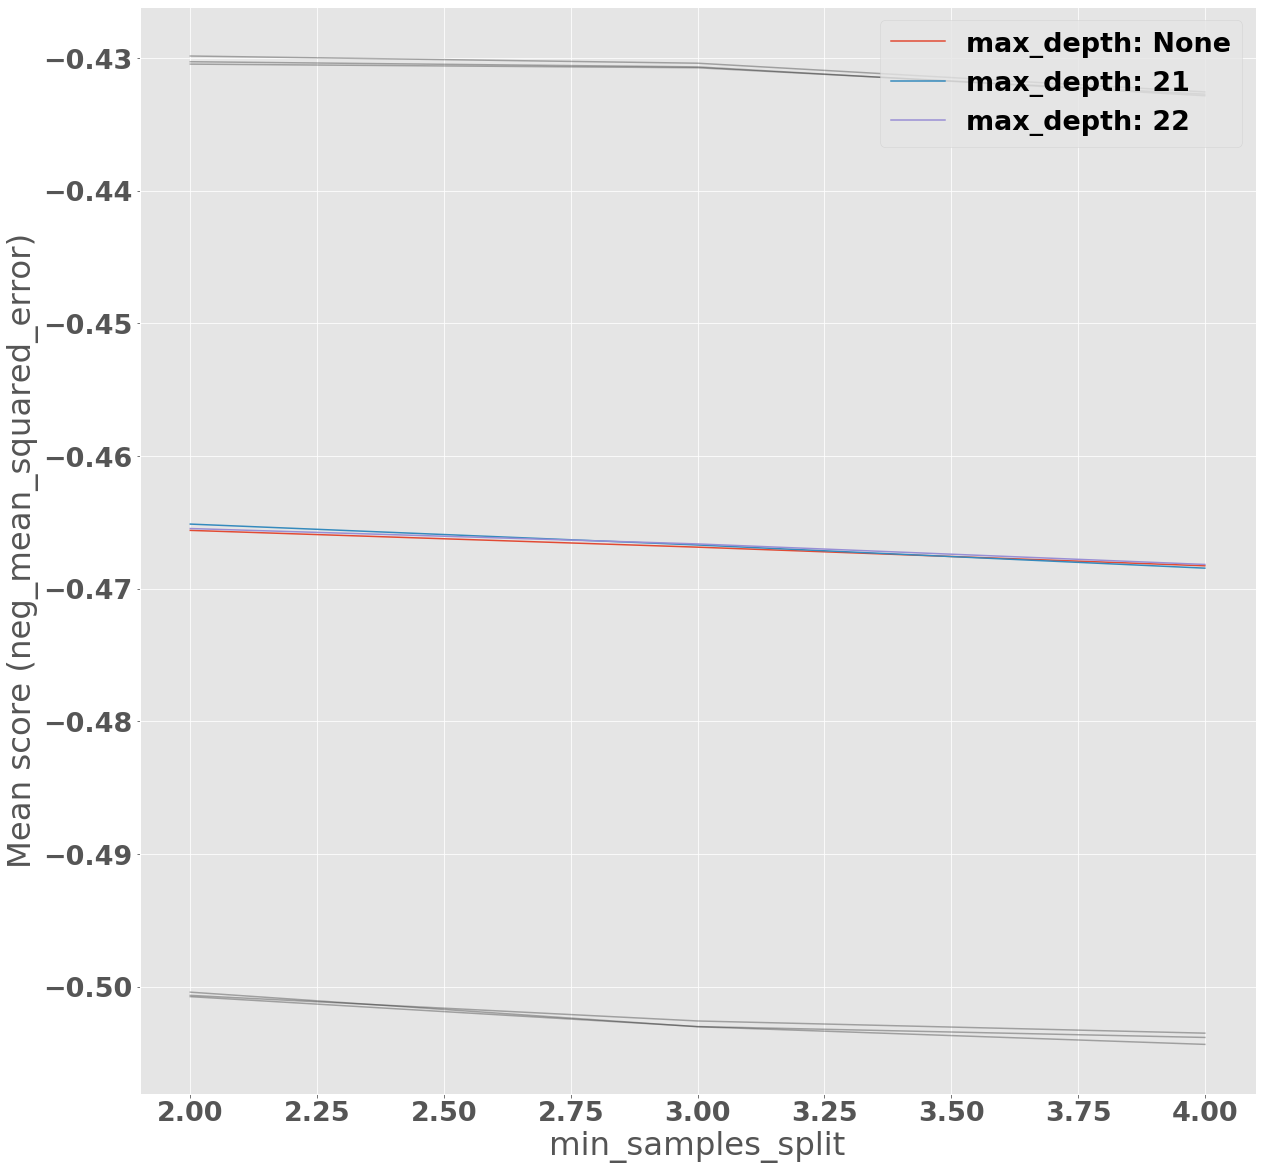

In [149]:
params = params_rf
grid = grid_rf
param1_name = 'max_depth'
param2_name = 'min_samples_split'
param1 = params[param1_name]
param2 = params[param2_name]

scores_df = pd.DataFrame(grid.cv_results_)

scores_mean = [x for x in scores_df['mean_test_score']]
scores_mean = np.array(scores_mean).reshape(len(param1), len(param2))
#scores_mean = np.swapaxes(scores_mean,0,1)
scores_std = [x for x in scores_df['std_test_score']]
scores_std = np.array(scores_std).reshape(len(param1), len(param2))
#scores_std = np.swapaxes(scores_std,0,1)

plt.figure(figsize=(20, 20))
for ind, i in enumerate(param1):
    plt.plot(param2, scores_mean[ind], label=param1_name+': ' + str(i))
    plt.plot(param2, scores_mean[ind] + scores_std[ind], color='black', alpha=0.3)
    plt.plot(param2, scores_mean[ind] - scores_std[ind], color='black', alpha=0.3)
plt.legend()
plt.xlabel(param2_name)
plt.ylabel('Mean score (neg_mean_squared_error)')
plt.show()

## Creating SVM
__Score history:__
- Test set RMSE of rf: 0.70

### SVM parameters
- __c:__
    - penalty parameeter (higher => overfitting)
- __shrinking:__
    - weather to use the shrinking heuristic
- __kernel:__
    - specifies the kernel type

In [98]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [131]:
scaler = RobustScaler()
svr = SVR()

In [132]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [133]:
pipe = make_pipeline(scaler, svr)

In [134]:
params_svr = {'svr__C': [1.0, 1.1, 1.2, 1.3, 1.4],
 'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'svr__shrinking': [False]}

grid_svr = GridSearchCV(estimator=pipe,
    param_grid=params_svr,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1)

In [135]:
grid_svr.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/loca

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('robustscaler',
                                        RobustScaler(copy=True,
                                                     quantile_range=(25.0,
                                                                     75.0),
                                                     with_centering=True,
                                                     with_scaling=True)),
                                       ('svr',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            shrinking=True, tol=0.001,
                                            verbose=False))],
                   

In [136]:
grid_svr.best_params_

{'svr__C': 1.3, 'svr__kernel': 'rbf', 'svr__shrinking': False}

In [137]:
y_pred_svr = grid_svr.predict(X_test)
rmse_test_svr = MSE(y_test, y_pred_svr)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test_svr))


Test set RMSE of rf: 0.70


In [87]:
print_metrics(y_pred_svr, y_test)

,MAE,MAPE,RMSE,R2
0,0.52,0.0917,0.7,0.36


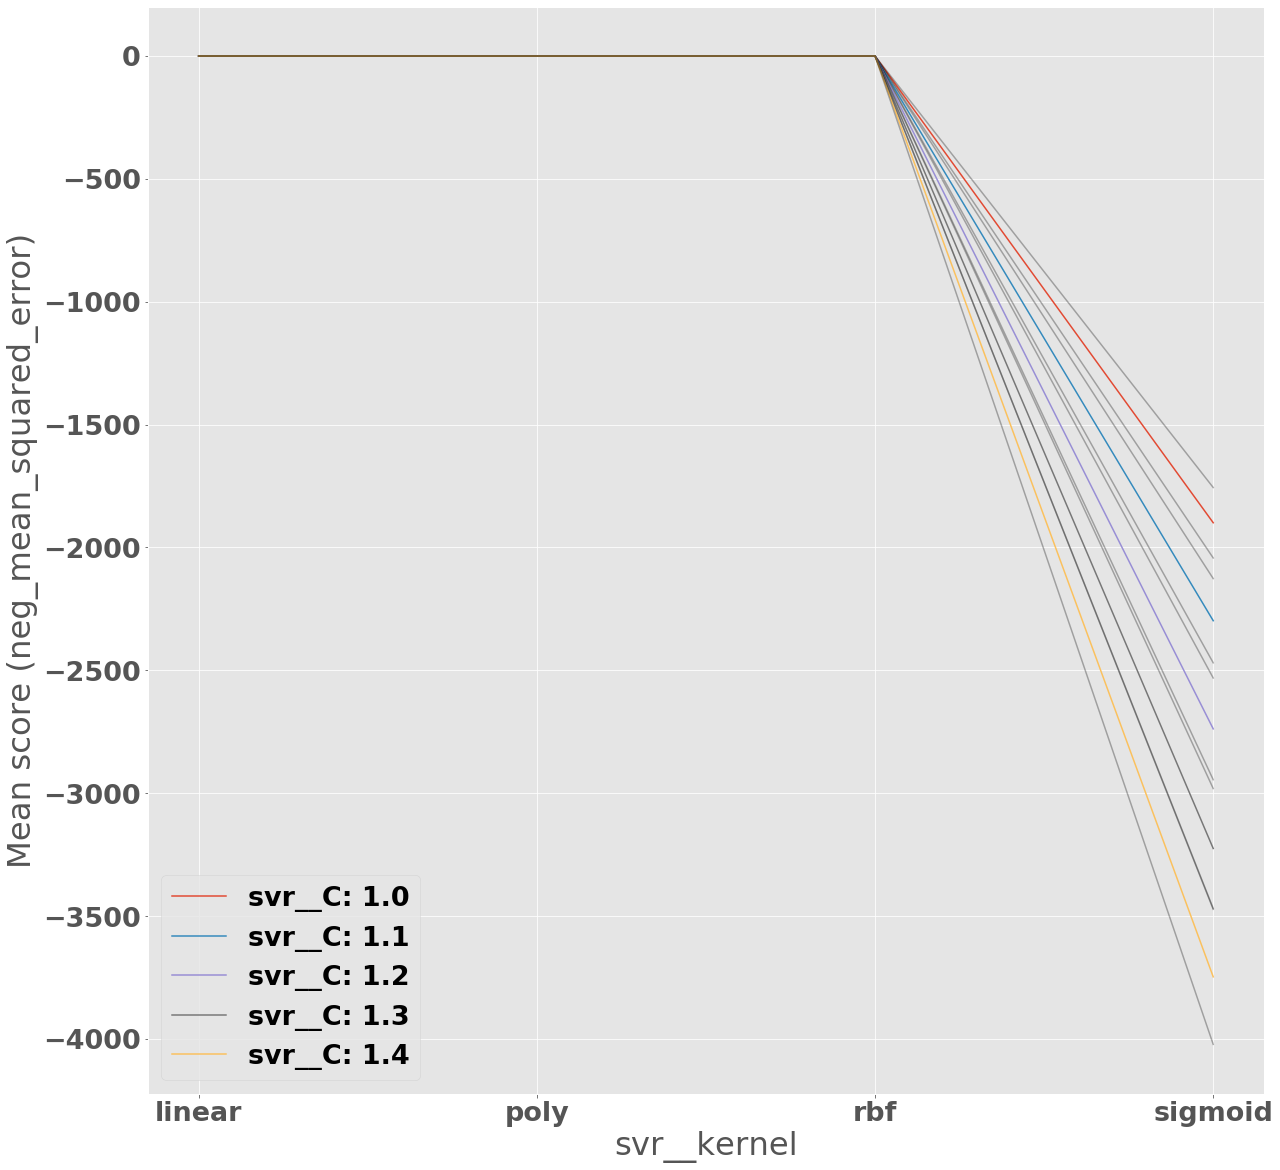

In [153]:
params = params_svr
grid = grid_svr
param1_name = 'svr__kernel'
param2_name = 'svr__C'
param1 = params[param1_name]
param2 = params[param2_name]

scores_df = pd.DataFrame(grid.cv_results_)

scores_mean = [x for x in scores_df['mean_test_score']]
scores_mean = np.array(scores_mean).reshape(len(param2), len(param1))
#scores_mean = np.swapaxes(scores_mean,0,1)
scores_std = [x for x in scores_df['std_test_score']]
scores_std = np.array(scores_std).reshape(len(param2), len(param1))
#scores_std = np.swapaxes(scores_std,0,1)

plt.figure(figsize=(20, 20))
for ind, i in enumerate(param2):
    plt.plot(param1, scores_mean[ind], label=param2_name+': ' + str(i))
    plt.plot(param1, scores_mean[ind] + scores_std[ind], color='black', alpha=0.3)
    plt.plot(param1, scores_mean[ind] - scores_std[ind], color='black', alpha=0.3)
plt.legend()
plt.xlabel(param1_name)
plt.ylabel('Mean score (neg_mean_squared_error)')
plt.show()

## Creating a GradientBoostingRegressor
__Score history:__
- Test set RMSE of rf: 0.59
- Test set RMSE of rf: 0.58

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

In [91]:
gbt = GradientBoostingRegressor(random_state=42)


In [92]:
params_gbt = {
'n_estimators': [500],
'max_depth': [5, 6, 7, 8, 9, 10],
'max_features': ['log2'],
'learning_rate': [0.02, 0.05, 0.1],
'subsample': [0.6]
    
}
# Instantiate 'grid_rf'
grid_gbt = GridSearchCV(estimator=gbt,
param_grid=params_gbt,
cv=3,
scoring='neg_mean_squared_error',
verbose=1,
n_jobs=-1)

In [93]:
grid_gbt.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [94]:
grid_gbt.best_params_

{'learning_rate': 0.02,
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 500,
 'subsample': 0.6}

In [95]:
best_model = grid_gbt.best_estimator_
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 0.63


In [123]:
print_metrics(y_pred, y_test)

,MAE,MAPE,RMSE,R2
0,0.42,0.0754,0.61,0.53


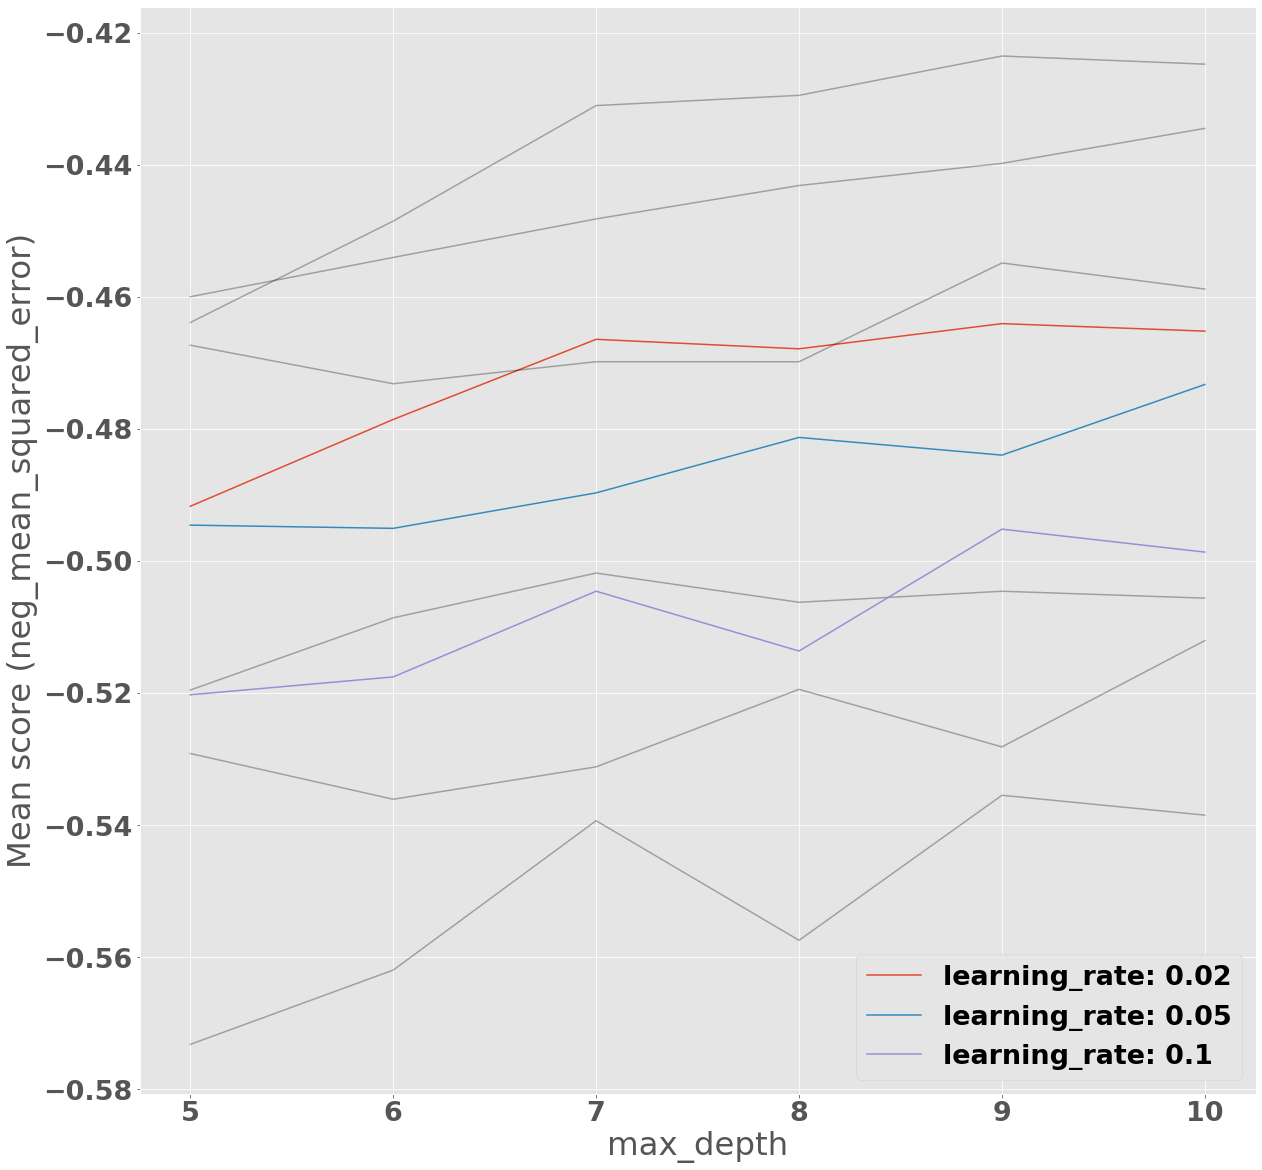

In [154]:
param1_name = 'max_depth'
param2_name = 'learning_rate'
param1 = params_gbt[param1_name]
param2 = params_gbt[param2_name]

scores_df = pd.DataFrame(grid_gbt.cv_results_)

scores_mean = [x for x in scores_df['mean_test_score']]
scores_mean = np.array(scores_mean).reshape(len(param2), len(param1))
#scores_mean = np.swapaxes(scores_mean,0,1)
scores_std = [x for x in scores_df['std_test_score']]
scores_std = np.array(scores_std).reshape(len(param2), len(param1))
#scores_std = np.swapaxes(scores_std,0,1)

plt.figure(figsize=(20, 20))
for ind, i in enumerate(param2):
    plt.plot(param1, scores_mean[ind], label=param2_name+': ' + str(i))
    plt.plot(param1, scores_mean[ind] + scores_std[ind], color='black', alpha=0.3)
    plt.plot(param1, scores_mean[ind] - scores_std[ind], color='black', alpha=0.3)
plt.legend()
plt.xlabel(param1_name)
plt.ylabel('Mean score (neg_mean_squared_error)')
plt.show()

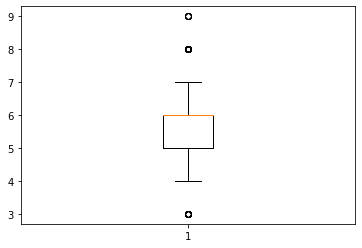

In [121]:
plt.boxplot(y)
plt.savefig('y_boxplot.png')

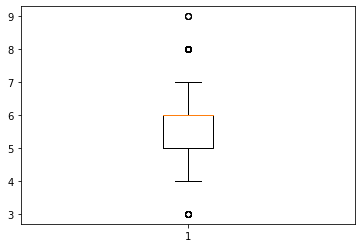

In [114]:
plt.boxplot(y_train)
plt.savefig('y_train_boxplot.png')
